In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource
from ctapipe.calib import CameraCalibrator
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.hillas import hillas_parameters
from copy import deepcopy
import os

In [109]:
import ctapipe
ctapipe.__version__

'0.11.0'

In [14]:
source = EventSource(input_url=get_dataset_path('gamma_test_large.simtel.gz'))
# source = event_source('/Users/thomasvuillaume/Work/CTA/Data/DL0/Simtel/LST_mono/gamma_20deg_180deg_run100___cta-prod3-demo-2147m-LaPalma-baseline-mono_off0.4.simtel',
#                      max_events=1000)

In [15]:
tot = 0
n = 3
for event in source:
    if 1 in event.r0.tel:
        if event.r0.tel[1].waveform[0].sum() > tot:
            tot = event.r0.tel[1].waveform[0].sum()
            big_event = deepcopy(event)
    if len(event.r0.tel) > n:
        be2 = deepcopy(event)
        n = len(event.r0.tel)

In [16]:
big_event.r0.tel

Map(ctapipe.containers.R0CameraContainer,
    {1: ctapipe.containers.R0CameraContainer:
                           waveform: numpy array containing ADC samples(n_channels,
                                     n_pixels, n_samples),
     2: ctapipe.containers.R0CameraContainer:
                           waveform: numpy array containing ADC samples(n_channels,
                                     n_pixels, n_samples),
     3: ctapipe.containers.R0CameraContainer:
                           waveform: numpy array containing ADC samples(n_channels,
                                     n_pixels, n_samples),
     4: ctapipe.containers.R0CameraContainer:
                           waveform: numpy array containing ADC samples(n_channels,
                                     n_pixels, n_samples),
     5: ctapipe.containers.R0CameraContainer:
                           waveform: numpy array containing ADC samples(n_channels,
                                     n_pixels, n_samples),
     7: ctapi

In [17]:
cal = CameraCalibrator(source.subarray)

In [18]:
cal(big_event)
cal(be2)

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [33]:
outdir = 'images_uncalibrated'
os.makedirs(outdir, exist_ok=True)

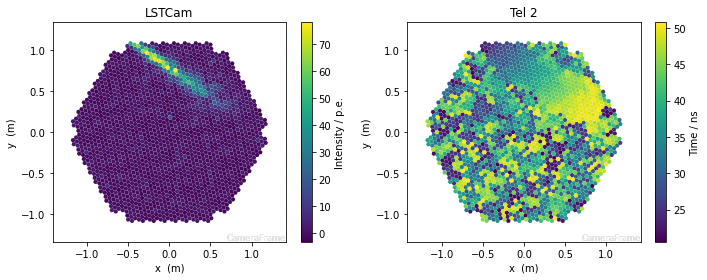

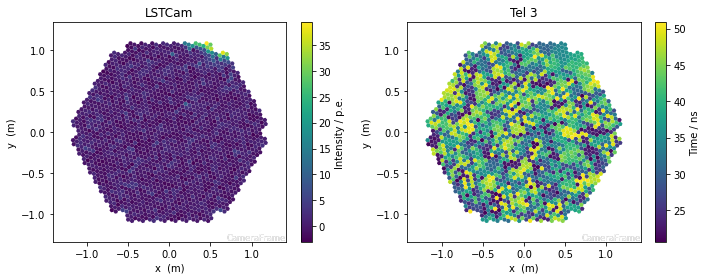

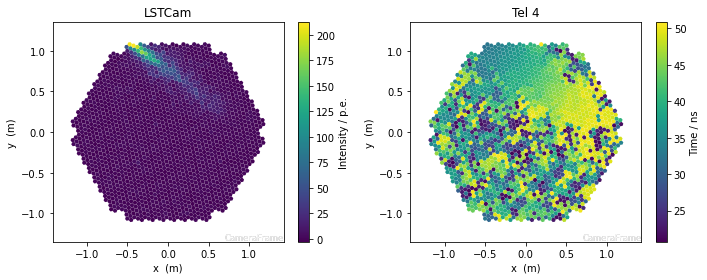

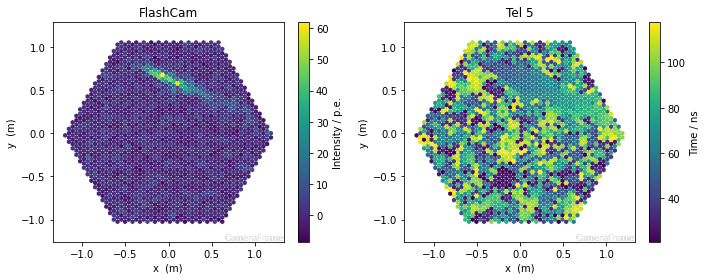

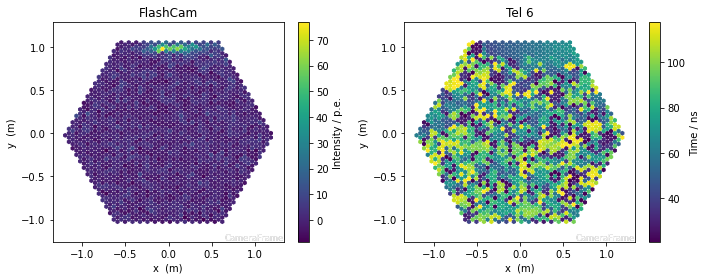

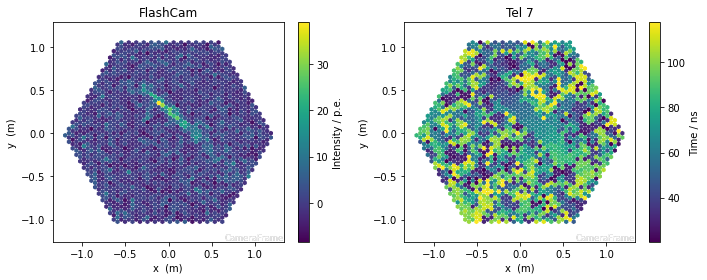

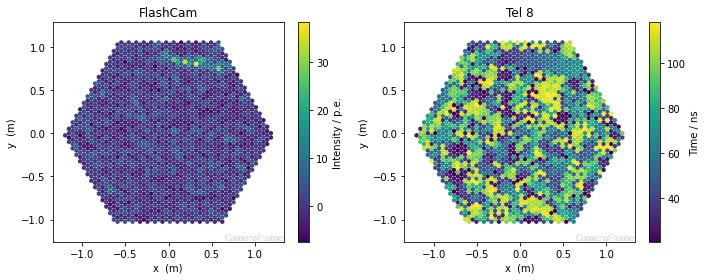

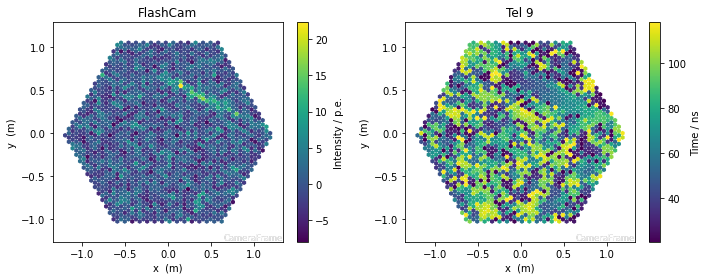

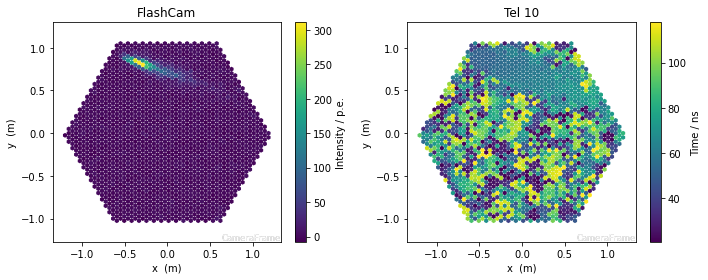

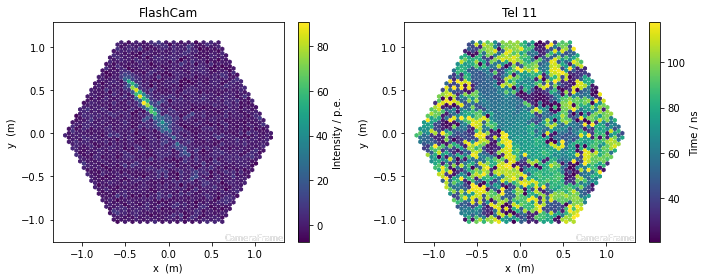

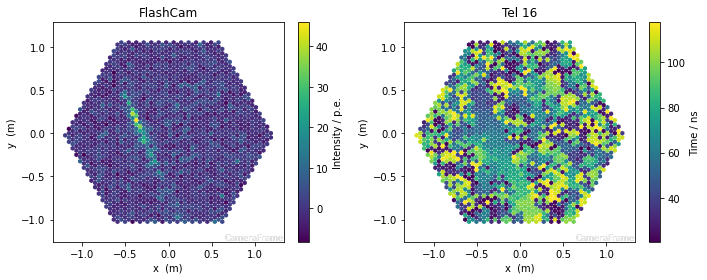

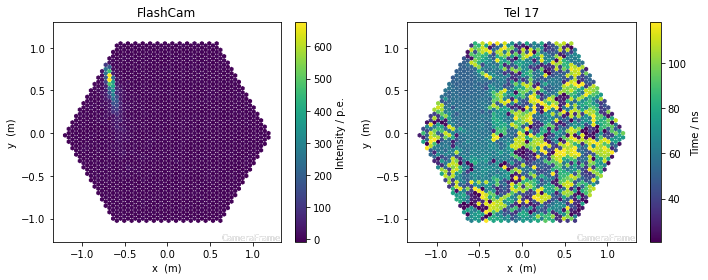

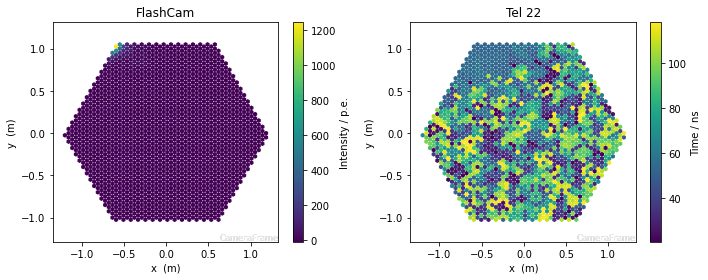

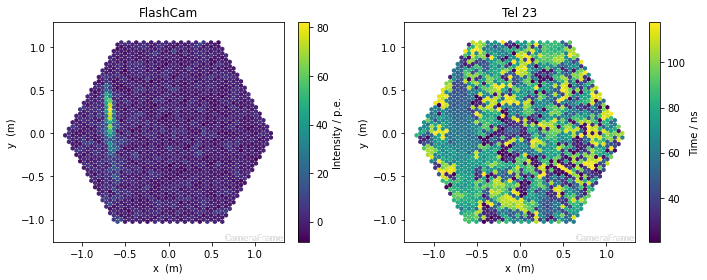

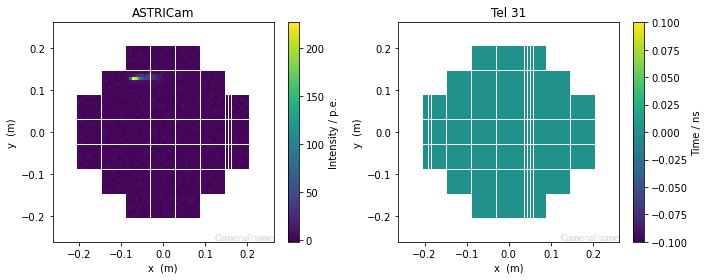

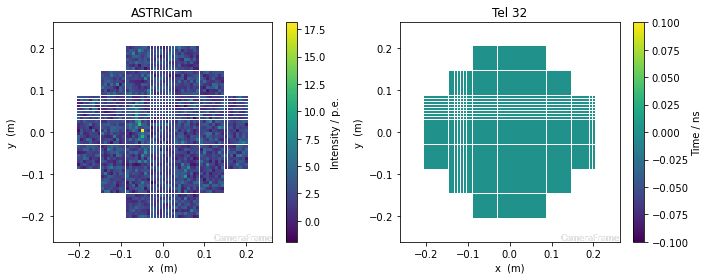

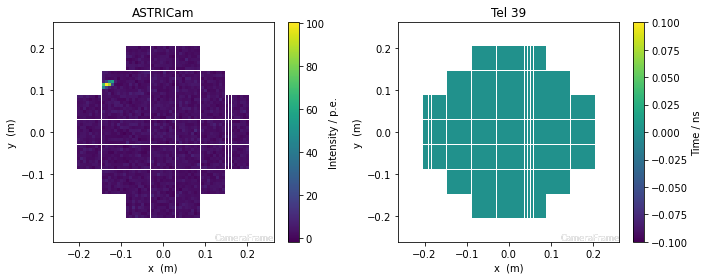

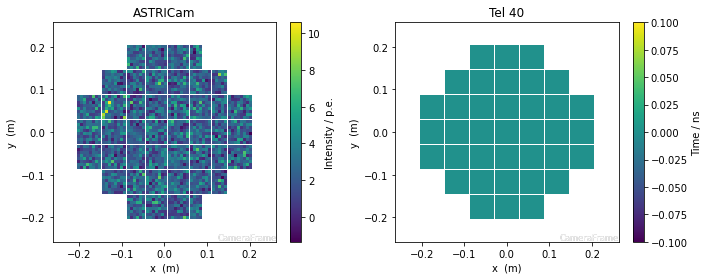

In [70]:
event = be2
for tel_id in list(event.r0.tel)[:]:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    geom = source.subarray.tels[tel_id].camera.geometry
    image = event.dl1.tel[tel_id].image
    pulse_time = event.dl1.tel[tel_id].peak_time
    display = CameraDisplay(geom, image, ax=axes[0])
    display.add_colorbar()
    display.colorbar.set_label('Intensity / p.e.', rotation=90)
    display.add_frame_name(color='white')
    display = CameraDisplay(geom, pulse_time, ax=axes[1])
    display.add_colorbar()
    display.colorbar.set_label('Time / ns', rotation=90)
    display.add_frame_name(color='white')
    
    axes[1].set_title(f'Tel {tel_id}')
    
    plt.tight_layout()
    
    plt.savefig(os.path.join(outdir, f'{event.index.event_id}-tel{tel_id:02d}.png'), dpi=250)
    plt.show()

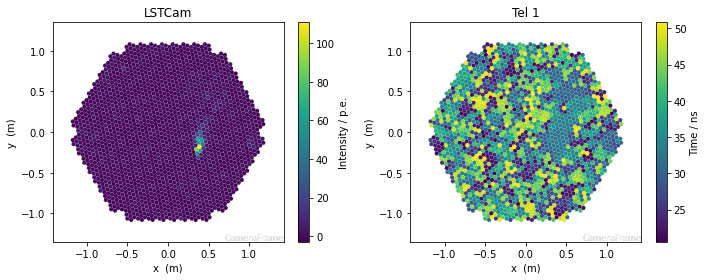

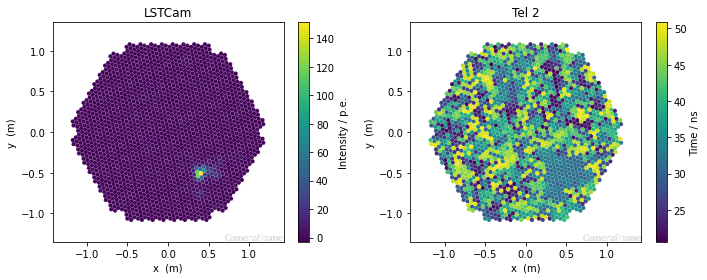

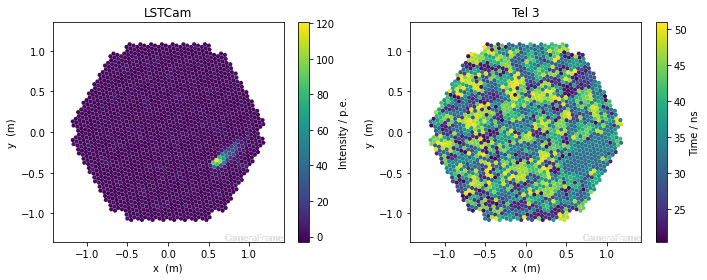

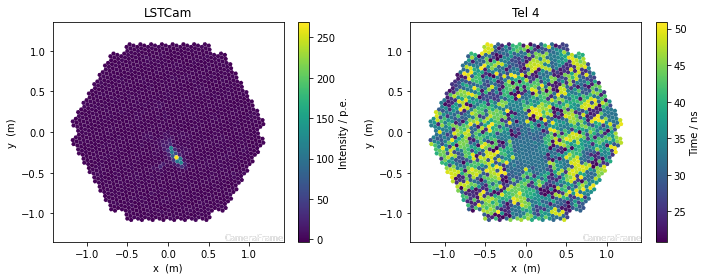

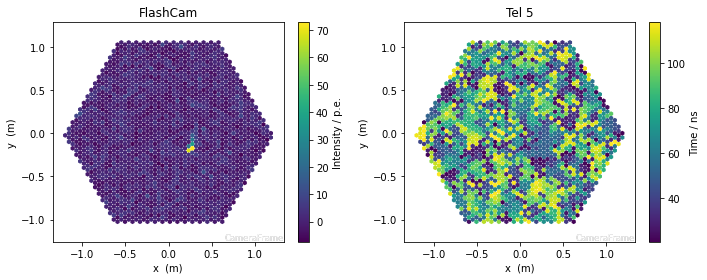

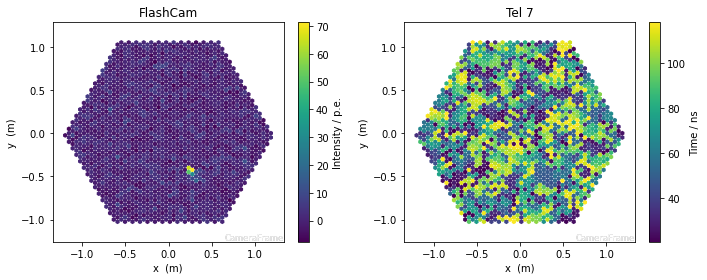

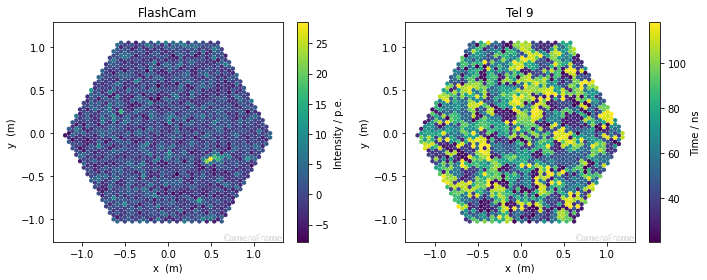

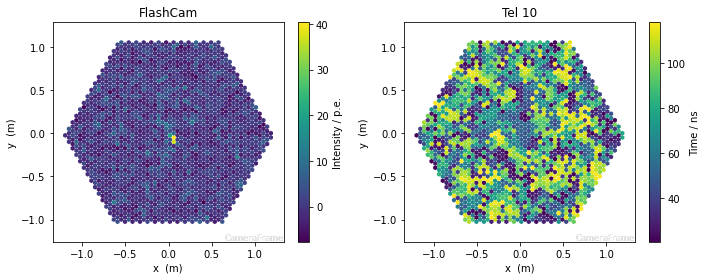

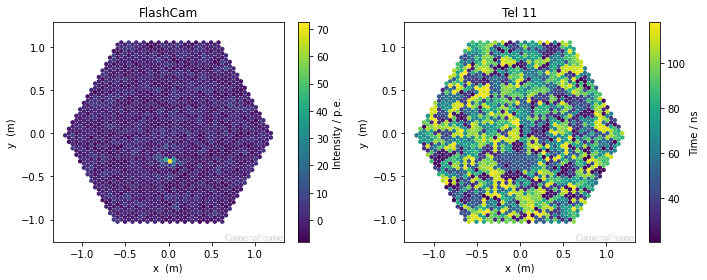

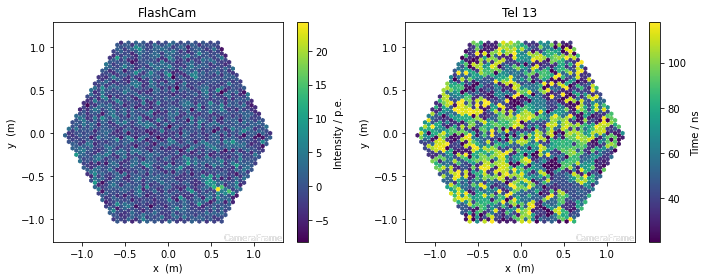

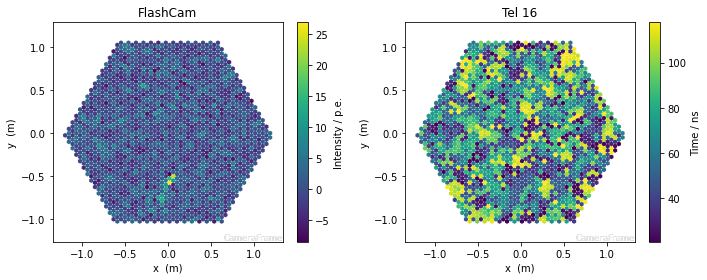

In [71]:
event = big_event
for tel_id in list(event.r0.tel)[:]:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    geom = source.subarray.tels[tel_id].camera.geometry
    image = event.dl1.tel[tel_id].image
    pulse_time = event.dl1.tel[tel_id].peak_time
    display = CameraDisplay(geom, image, ax=axes[0])
    display.add_colorbar()
    display.colorbar.set_label('Intensity / p.e.', rotation=90)
    display.add_frame_name(color='white')
    display = CameraDisplay(geom, pulse_time, ax=axes[1])
    display.add_colorbar()
    display.colorbar.set_label('Time / ns', rotation=90)
    display.add_frame_name(color='white')
    
    axes[1].set_title(f'Tel {tel_id}')
    
    plt.tight_layout()
    
    plt.savefig(os.path.join(outdir, f'{event.index.event_id}-tel{tel_id:02d}.png'), dpi=250)
    plt.show()

In [73]:
# pick an event and a tel
event = big_event
print(event.r0.tel)
tel_id = 1

Map(<class 'ctapipe.containers.R0CameraContainer'>, {1: ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples), 2: ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples), 3: ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples), 4: ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples), 5: ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples), 7: ctapipe.containers.R0CameraContainer:
                      waveform: nump

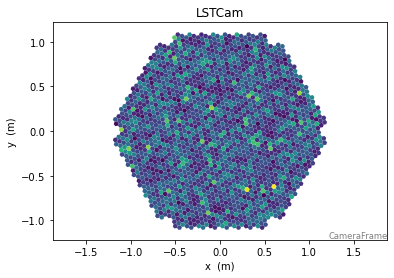

In [74]:
geom = source.subarray.tel[tel_id].camera.geometry
CameraDisplay(geom, event.r0.tel[tel_id].waveform[0][:,0])

In [78]:
output_dir = f'images_gif_tel_{tel_id}'
os.makedirs(output_dir, exist_ok=True)

In [81]:
# define some plotting options

visible_axis = False
color = 'black' # or 'dark'
transparent = True
camera_border_color = 'black' # or None


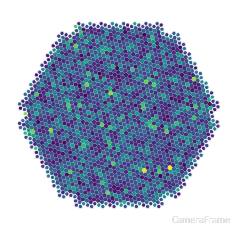

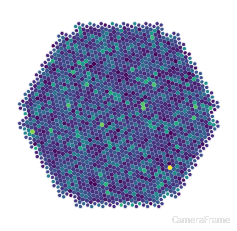

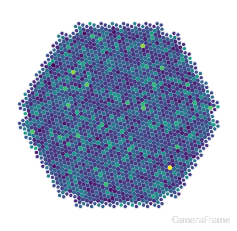

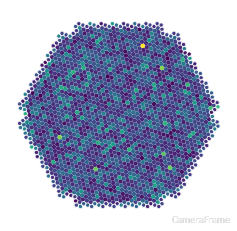

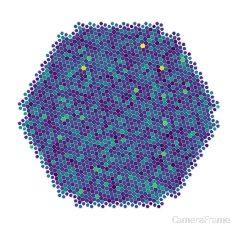

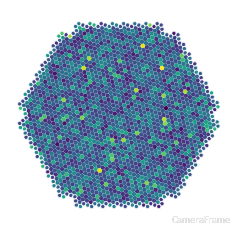

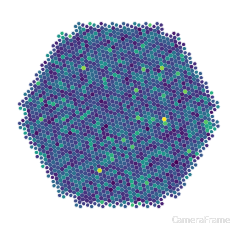

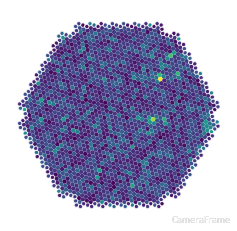

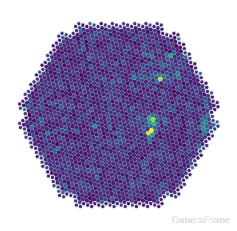

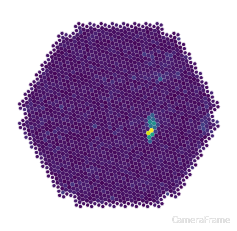

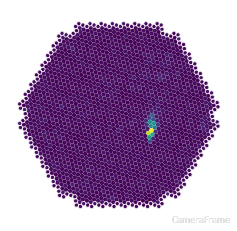

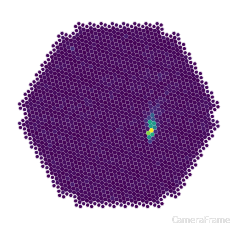

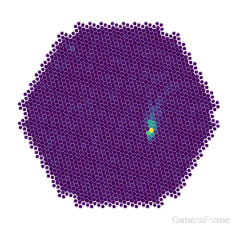

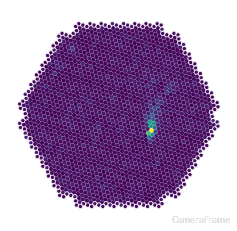

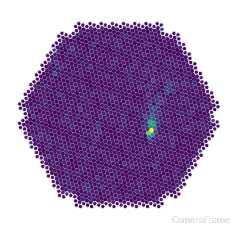

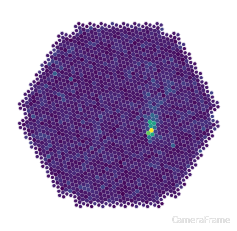

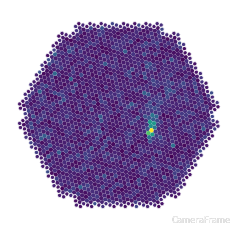

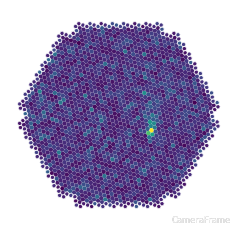

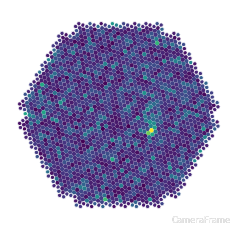

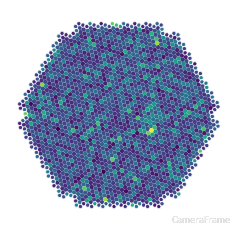

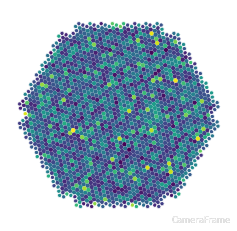

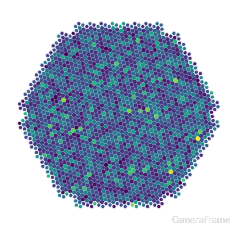

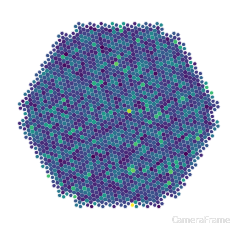

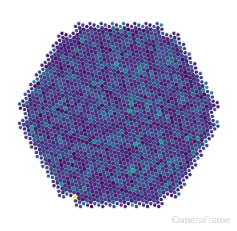

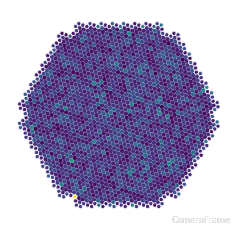

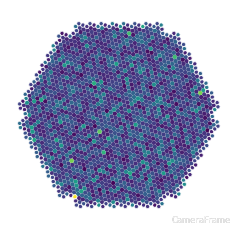

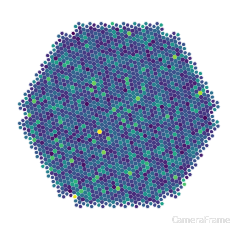

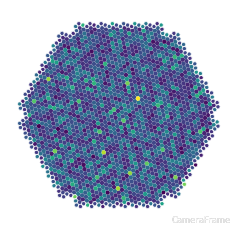

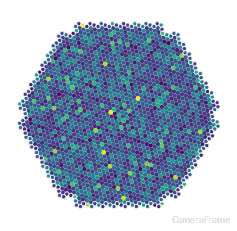

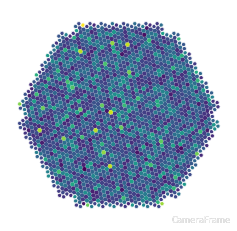

In [86]:
for ii in range(event.r0.tel[tel_id].waveform[0].shape[1]):
    image = event.r0.tel[tel_id].waveform[0][:,ii]
#     print(image.shape)
    fig, ax = plt.subplots(figsize=(4, 4))
    display = CameraDisplay(geom, image)
    display.add_frame_name(color='white')
    if camera_border_color is not None:
        display.highlight_pixels(geom.get_border_pixel_mask(), color='white')
    fig.axes[0].get_xaxis().set_visible(visible_axis)
    fig.axes[0].get_yaxis().set_visible(visible_axis)
    fig.patch.set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
    ax.set_title('')

    plt.savefig(os.path.join(output_dir, f'image_{ii:02d}.png'), dpi=400, transparent=transparent)
    plt.show()

In [87]:
# produce the gif
gif_cmd = f'convert -delay 40 -loop 0 {output_dir}/*.png waveform_tel_{tel_id}.gif'
os.system(gif_cmd)

0

In [88]:
ls -lsh *.gif

14368 -rw-r--r--  1 thomasvuillaume  staff   6,1M  1 déc 19:37 waveform_tel_1.gif


# Pipeline

## Calibration

In [89]:
cal = CameraCalibrator(source.subarray)
cal(big_event)

In [90]:
tel_id = 1

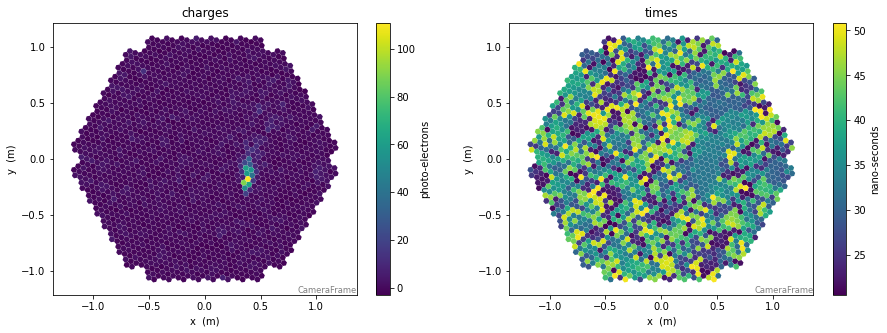

In [91]:
visible_axis = True

fig, axes = plt.subplots(1, 2, figsize=(15,5))
image = event.dl1.tel[tel_id].image
d0 = CameraDisplay(geom, image, ax=axes[0])
axes[0].set_title('charges')
d0.add_colorbar(ax=axes[0])
d0.colorbar.set_label('photo-electrons')

pulse_time = event.dl1.tel[tel_id].peak_time

d1 = CameraDisplay(geom, pulse_time, ax=axes[1])
axes[1].set_title('times')
d1.add_colorbar(ax=axes[1])
d1.colorbar.set_label('nano-seconds')

for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'calibrated_tel_{tel_id}.png', dpi=400, transparent=True)

In [92]:
visible_axisble_axis = False

In [99]:
camera_border_color = None

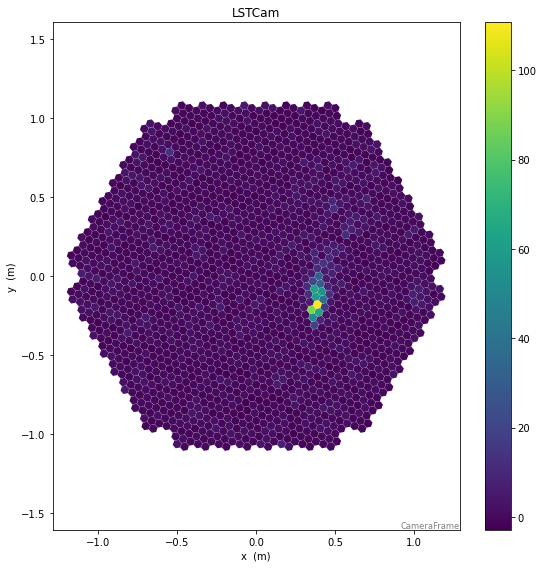

In [100]:
fig = plt.figure(figsize=(8,8))
display = CameraDisplay(geom, image)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'calibrated_charges_tel_{tel_id}.png', dpi=400, transparent=True)

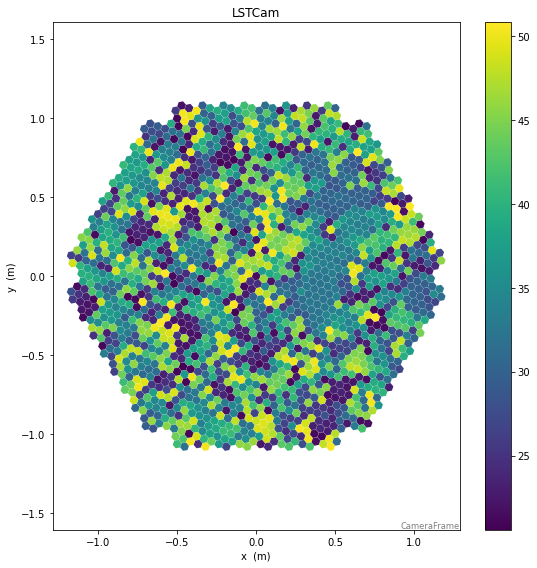

In [101]:
fig = plt.figure(figsize=(8,8))
display = CameraDisplay(geom, pulse_time)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'calibrated_times_tel_{tel_id}.png', dpi=400, transparent=True)

In [102]:
signal_pixels = tailcuts_clean(geom, image, picture_thresh=6, boundary_thresh=3, min_number_picture_neighbors=2)

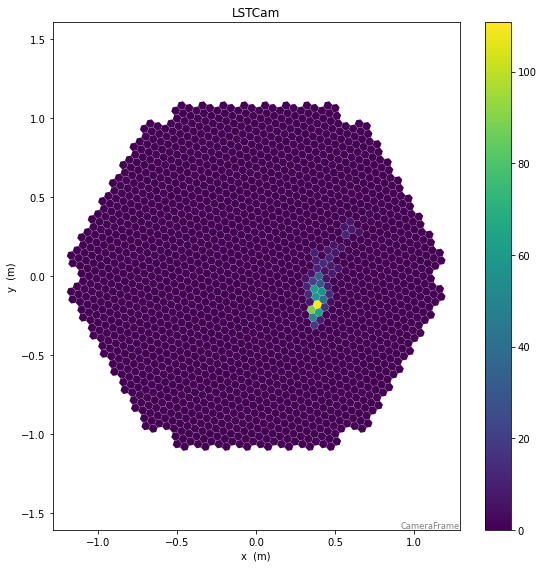

In [103]:
cleaned_image = deepcopy(image)
cleaned_image[~signal_pixels] = 0
fig = plt.figure(figsize=(8,8))
display = CameraDisplay(geom, cleaned_image)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'cleaned_tel_{tel_id}.png', dpi=400, transparent=True)

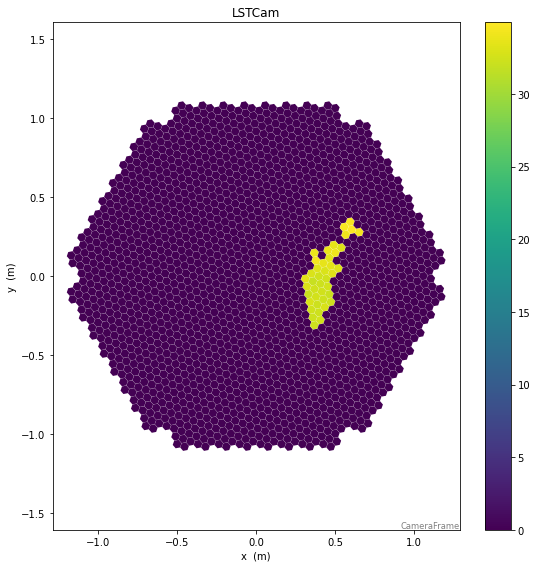

In [104]:
cleaned_time = deepcopy(pulse_time)
cleaned_time[~signal_pixels] = 0
fig = plt.figure(figsize=(8,8))

display = CameraDisplay(geom, cleaned_time)

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()
    
fig.tight_layout()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'cleaned_time_tel_{tel_id}.png', dpi=400)

In [105]:
hillas = hillas_parameters(geom, cleaned_image)

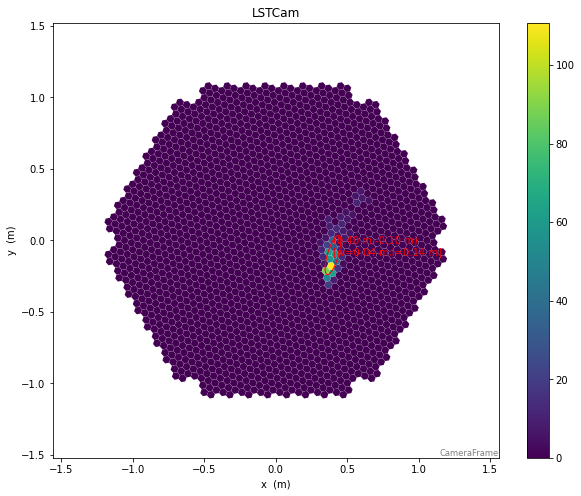

In [106]:
fig = plt.figure(figsize=(10,8))
display = CameraDisplay(geom, cleaned_image)
display.overlay_moments(hillas, color='red')

if camera_border_color is not None:
    display.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    display.add_colorbar()

axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)

fig.savefig(f'hillas_tel_{tel_id}.png', dpi=400, transparent=True)

In [107]:
visible_axis = True
camera_border_color = None

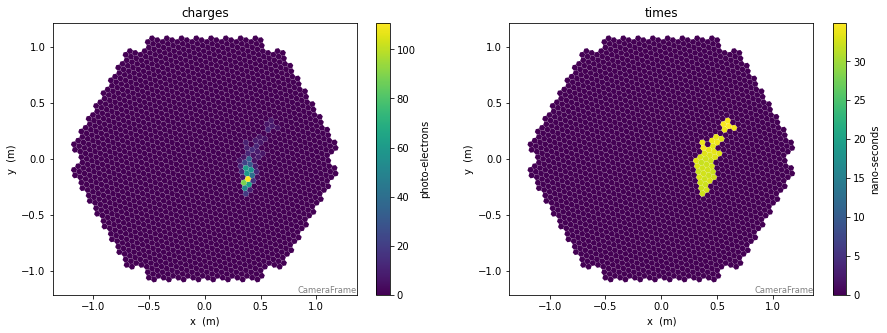

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
image = event.dl1.tel[tel_id].image
d0 = CameraDisplay(geom, cleaned_image, ax=axes[0])
# d0.overlay_moments(hillas, color='red')
axes[0].set_title('charges')

if camera_border_color is not None:
    d0.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    d0.add_colorbar(ax=axes[0])
    d0.colorbar.set_label('photo-electrons')


pulse_time = np.minimum(40, np.maximum(0, event.dl1.tel[tel_id].peak_time))
cleaned_time = deepcopy(pulse_time)
cleaned_time[~signal_pixels] = 0

d1 = CameraDisplay(geom, cleaned_time, ax=axes[1])
axes[1].set_title("times")

if camera_border_color is not None:
    d1.highlight_pixels(geom.get_border_pixel_mask(), color=camera_border_color)

if visible_axis:
    d1.add_colorbar(ax=axes[1])
    d1.colorbar.set_label('nano-seconds')


axes = fig.get_axes()
for ax in axes:
    ax.get_xaxis().set_visible(visible_axis)
    ax.get_yaxis().set_visible(visible_axis)
    if not visible_axis:
        ax.axis('off')
        ax.set_title('')
fig.patch.set_visible(visible_axis)


plt.savefig(f'cleaned_tel_{tel_id}.png', dpi=400, transparent=True)